<a href="https://colab.research.google.com/github/sonnylewis1/tensorflow-classification/blob/main/Tensorflow_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **IMPORTING OF LIBRARIES**

In [9]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras import backend
import matplotlib.pyplot as plt
import numpy as np

### **GETTING DATASET FROM KERAS**

In [3]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [4]:
print(train_images.shape[0], test_images.shape[0])

60000 10000


In [7]:
train_images.shape

(60000, 28, 28)

In [10]:
tf.keras.backend.image_data_format()

'channels_last'

In [11]:
if tf.keras.backend.image_data_format() == 'channels_first':
    train_images = train_images.reshape(train_images.shape[0], 1, 28, 28)
    test_images = test_images.reshape(test_images.shape[0], 1, 28, 28)
    input_shape = (1, 28, 28)
else:
    train_images = train_images.reshape(train_images.shape[0], 28, 28, 1)
    test_images = test_images.reshape(test_images.shape[0], 28, 28, 1)
    input_shape = (28, 28, 1)

In [12]:
train_images.shape

(60000, 28, 28, 1)

In [13]:
train_images = train_images.astype('float32')
test_images = test_images.astype('float32')
train_images /= 255
test_images /= 255

In [14]:
train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [15]:
test_labels = tensorflow.keras.utils.to_categorical(test_labels, 10)
train_labels = tensorflow.keras.utils.to_categorical(train_labels,10)

In [16]:
train_labels

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

### **DISPLAYING ONE OF THE IMAGES**

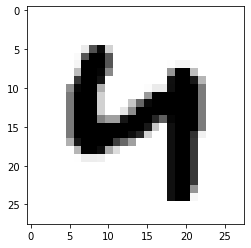

In [17]:
image = train_images[222].reshape([28, 28])
plt.imshow(image, cmap=plt.get_cmap('gray_r'))
plt.show()

### **BUILDING THE MODEL**

In [18]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 12, 12, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 9216)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               1179776   
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0

In [19]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [20]:
training = model.fit(train_images, train_labels, batch_size=32,
                    epochs=10, verbose=1,
                    validation_data=(test_images, test_labels))

Epoch 1/10
1875/1875 [==============================] - 144s 76ms/step - loss: 0.3737 - accuracy: 0.8844 - val_loss: 0.0548 - val_accuracy: 0.9819
Epoch 2/10
1875/1875 [==============================] - 142s 76ms/step - loss: 0.0888 - accuracy: 0.9740 - val_loss: 0.0331 - val_accuracy: 0.9889
Epoch 3/10
1875/1875 [==============================] - 141s 75ms/step - loss: 0.0685 - accuracy: 0.9799 - val_loss: 0.0288 - val_accuracy: 0.9898
Epoch 4/10
1875/1875 [==============================] - 141s 75ms/step - loss: 0.0527 - accuracy: 0.9837 - val_loss: 0.0319 - val_accuracy: 0.9886
Epoch 5/10
1875/1875 [==============================] - 142s 76ms/step - loss: 0.0455 - accuracy: 0.9852 - val_loss: 0.0283 - val_accuracy: 0.9915
Epoch 6/10
1875/1875 [==============================] - 142s 76ms/step - loss: 0.0382 - accuracy: 0.9874 - val_loss: 0.0360 - val_accuracy: 0.9893
Epoch 7/10
1875/1875 [==============================] - 141s 75ms/step - loss: 0.0338 - accuracy: 0.9898 - val_loss: 0

## **EVALUATING MODEL**

In [21]:
model_eval = model.evaluate(test_images, test_labels)

313/313 [==============================] - 5s 16ms/step - loss: 0.0299 - accuracy: 0.9926


In [22]:
model_eval

[0.02987605333328247, 0.9926000237464905]

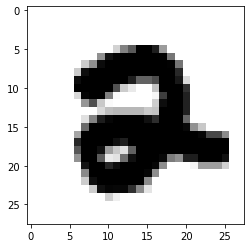

In [23]:
image = np.reshape(test_images[222], (28, 28))
plt.imshow(image, cmap=plt.get_cmap('gray_r'))
plt.show()

In [24]:
image = np.reshape(test_images[222], (1, 28, 28, 1))
prediction = model.predict(image)

In [25]:
prediction

array([[3.8658712e-08, 7.3985144e-11, 9.9999917e-01, 4.3062590e-10,
        1.7030454e-12, 2.0369667e-14, 2.2898543e-12, 2.0396194e-09,
        7.8966002e-07, 1.2485510e-12]], dtype=float32)

In [26]:
prediction = np.argmax(prediction)
prediction

2